In [ ]:
!pip install catboost

In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


from sklearn.metrics import f1_score, confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
print(pd.__version__)

2.1.4


In [ ]:
# Load breast cancer dataset
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [26]:
X.shape

(569, 30)

In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for models that need scaling (SVM and Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
X_test.shape

(114, 30)

Evaluating SVM:
SVM F1-score: 0.9861


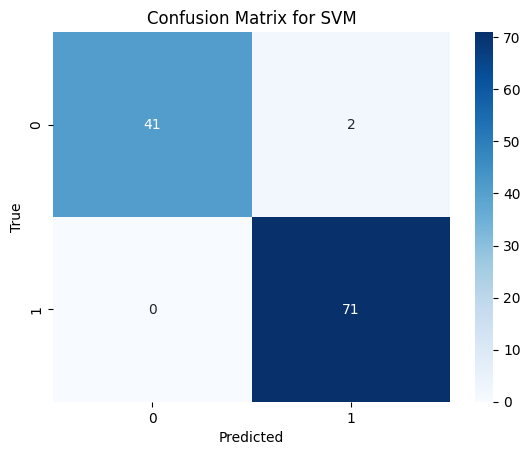

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [25]:
# 1. Support Vector Machine (SVM)
print("Evaluating SVM:")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate F1-score
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM F1-score: {f1_svm:.4f}")

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"SVM Classification Report:\n", classification_report(y_test, y_pred_svm))



Evaluating Naive Bayes:
Naive Bayes F1-score: 0.9722


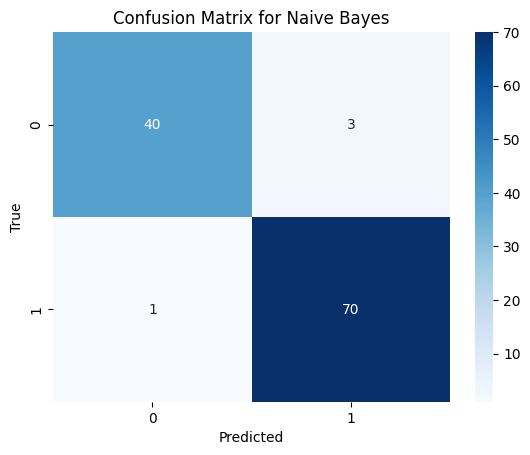

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [29]:
# 2. Naive Bayes
print("\nEvaluating Naive Bayes:")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate F1-score
f1_nb = f1_score(y_test, y_pred_nb)
print(f"Naive Bayes F1-score: {f1_nb:.4f}")

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))




Evaluating Random Forest:
Random Forest F1-score: 0.9722


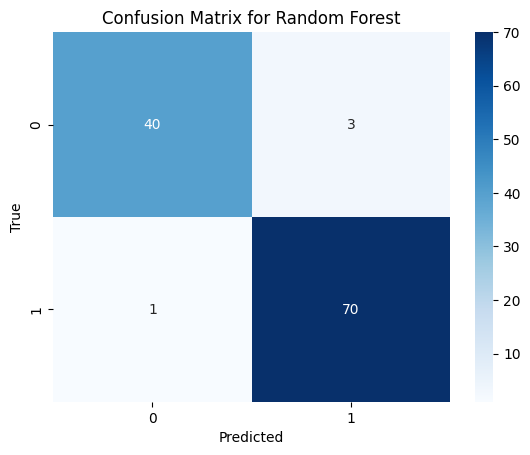

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [30]:
# 3. Random Forest
print("\nEvaluating Random Forest:")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1-score: {f1_rf:.4f}")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))



Evaluating CatBoost:
CatBoost F1-score: 0.9790


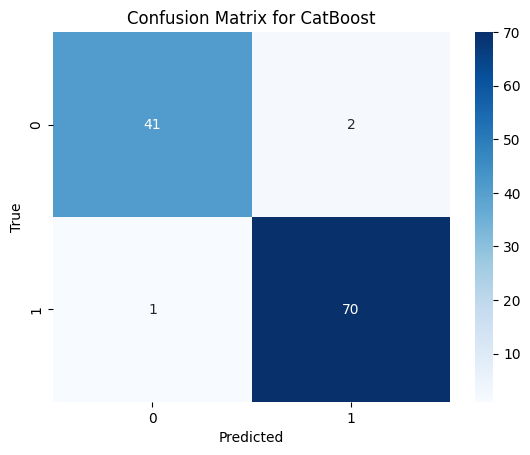

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [31]:
# 4. CatBoost
print("\nEvaluating CatBoost:")
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

# Calculate F1-score
f1_catboost = f1_score(y_test, y_pred_catboost)
print(f"CatBoost F1-score: {f1_catboost:.4f}")

# Confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
sns.heatmap(cm_catboost, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))




Evaluating LightGBM:
LightGBM F1-score: 0.9722


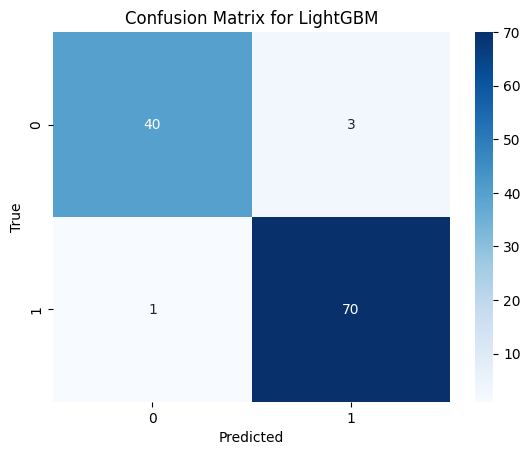

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [46]:
# 5. LightGBM
print("\nEvaluating LightGBM:")
lgbm_model = LGBMClassifier(verbose=-1, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
# Calculate F1-score
f1_lgbm = f1_score(y_test, y_pred_lgbm)
print(f"LightGBM F1-score: {f1_lgbm:.4f}")

# Confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))



Evaluating XGBoost:
XGBoost F1-score: 0.9650


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:56:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


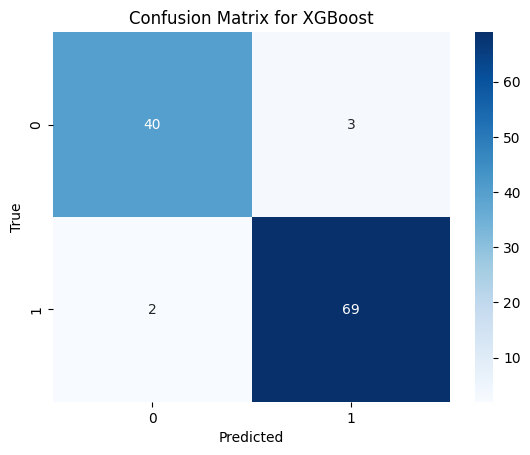

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [34]:
# 6. XGBoost
print("\nEvaluating XGBoost:")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate F1-score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost F1-score: {f1_xgb:.4f}")

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


In [35]:
# Summary of F1-scores for comparison
print("\nModel F1-scores:")
print(f"SVM: {f1_svm:.4f}")
print(f"Naive Bayes: {f1_nb:.4f}")
print(f"Random Forest: {f1_rf:.4f}")
print(f"CatBoost: {f1_catboost:.4f}")
print(f"LightGBM: {f1_lgbm:.4f}")
print(f"XGBoost: {f1_xgb:.4f}")

# Model selection based on F1-score
best_model_name = max(
    [("SVM", f1_svm),
     ("Naive Bayes", f1_nb),
     ("Random Forest", f1_rf),
     ("CatBoost", f1_catboost),
     ("LightGBM", f1_lgbm),
     ("XGBoost", f1_xgb)],
    key=lambda x: x[1]
)[0]
print(f"\nThe best model based on F1-score is: {best_model_name}")


Model F1-scores:
SVM: 0.9861
Naive Bayes: 0.9722
Random Forest: 0.9722
CatBoost: 0.9790
LightGBM: 0.9722
XGBoost: 0.9650

The best model based on F1-score is: SVM
